In [1]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 8),
          'figure.titlesize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'lines.markersize': 10
          }
pylab.rcParams.update(params)

In [49]:
from PIL import Image, ImageFont, ImageDraw

digits = [i for i in range(10)]
resol = (12,17)
for digit in digits:
    img = Image.new('L', resol, 255)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("fonts/OpenSans-Semibold.ttf", 21)
    draw.text((0, -7),str(digit),0,font=font)
    img = img.convert('1', dither=Image.NONE)
    img.save('digit_images/digit_number_img_'+str(digit)+'.png')


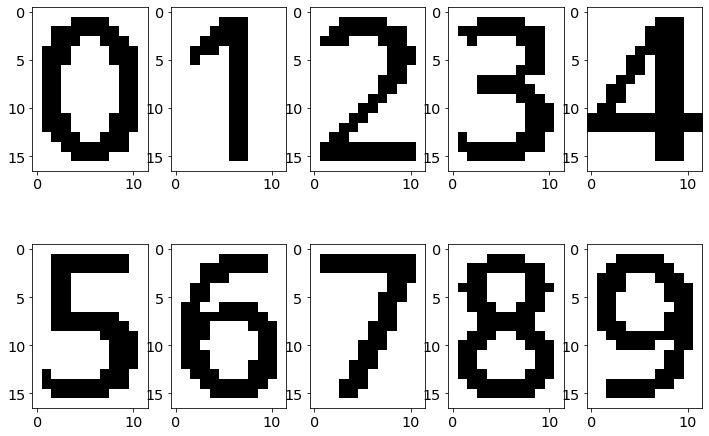

In [188]:
from pathlib import Path
from numpy import asarray
import matplotlib.pyplot as plt

dig_images = []
files = Path('digit_images').glob('**/*.png')

for i, file in enumerate(files):
    dig = Image.open(file)
    dig_images.append(asarray(dig, dtype=float))

for i in range(len(dig_images)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(dig_images[i], cmap=plt.get_cmap('binary_r'))

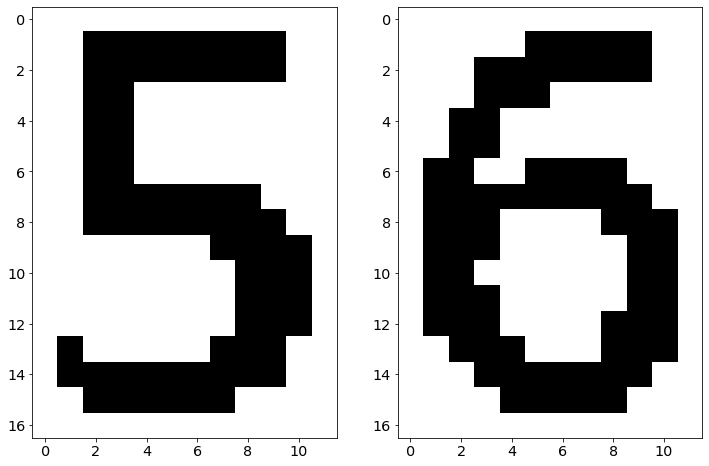

In [164]:
import skimage.io as io
from numpy import asarray
import matplotlib.pyplot as plt

five = Image.open('digit_images/digit_number_img_5.png')
five = asarray(five, dtype=float)

six = Image.open('digit_images/digit_number_img_6.png')
six = asarray(six, dtype=float)

images = [five, six]

for i in range(len(images)):
    ax = plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap=plt.get_cmap('binary_r'))



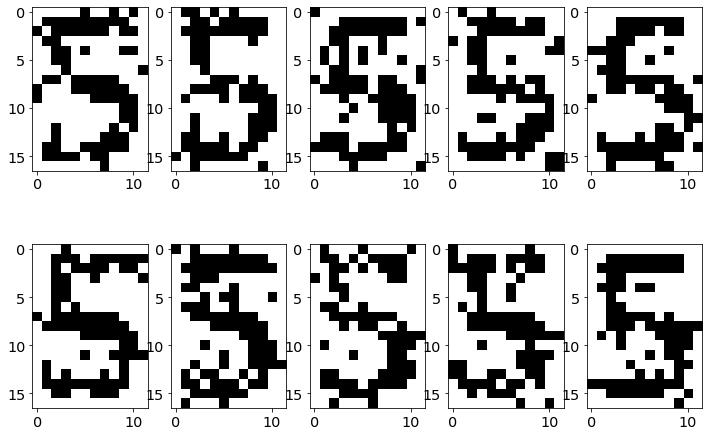

In [169]:
from skimage.util import random_noise

five_noise_low = [random_noise(five,mode='s&p', amount=0.3) for x in range (10)]

for i in range(len(five_noise_low)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(five_noise_low[i], cmap=plt.get_cmap('binary_r'))

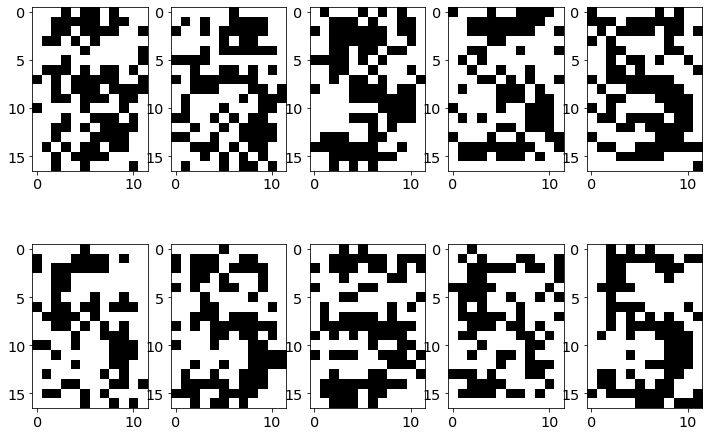

In [174]:
five_noise_high = [random_noise(five,mode='s&p', amount=0.5) for x in range (10)]

for i in range(len(five_noise_high)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(five_noise_high[i], cmap=plt.get_cmap('binary_r'))

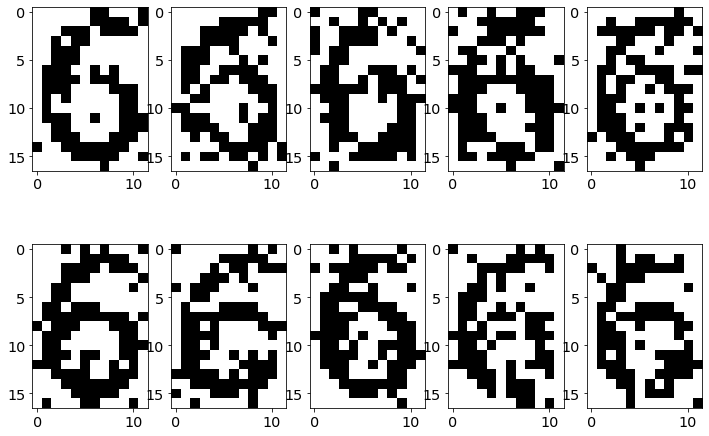

In [175]:
six_noise_low = [random_noise(six,mode='s&p', amount=0.3) for x in range (10)]

for i in range(len(six_noise_low)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(six_noise_low[i], cmap=plt.get_cmap('binary_r'))

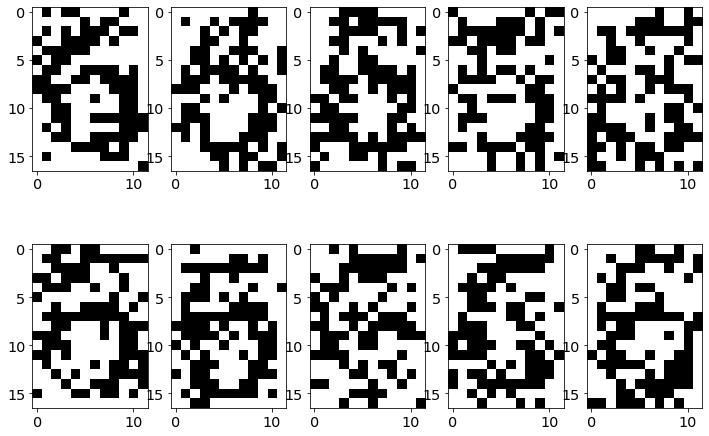

In [176]:
six_noise_high = [random_noise(six,mode='s&p', amount=0.5) for x in range (10)]

for i in range(len(six_noise_high)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(six_noise_high[i], cmap=plt.get_cmap('binary_r'))

In [71]:
from scipy.spatial import distance
import numpy as np
from pathlib import Path

size = resol[0]*resol[1]

dig_images = []
files = Path('digit_images').glob('**/*.png')

for i, file in enumerate(files):
    dig = Image.open(file)
    dig_images.append(asarray(dig, dtype=float))

ref_digits = [np.array(dig.reshape(size)) for dig in dig_images]

five_noise_low_vect = np.array([img.reshape(size) for img in five_noise_low])
five_noise_high_vect = np.array([img.reshape(size) for img in five_noise_high])

six_noise_low_vect = np.array([img.reshape(size) for img in six_noise_low])
six_noise_high_vect = np.array([img.reshape(size) for img in six_noise_high])

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0.

In [182]:
import pandas as pd

cols = [i for i in range (len(ref_digits))]
indices = [f'five noised ({i})' for i in range(len(five_noise_low_vect))]

df = pd.DataFrame(columns=cols)
row = []
for five_nsd in five_noise_low_vect:
    for digit in ref_digits:
        row.append(np.round(1-distance.hamming(five_nsd, digit),4))
    df.loc[len(df)] = row
    row = []

df = df.set_index(pd.Index(indices))
df.to_excel('hamming_results/five/five_noised_low_recognizing.xlsx')
pd.DataFrame(df.idxmax(axis=1)).T.to_excel('hamming_results/five/five_low_noise_pred.xlsx')
p = list(df.idxmax(axis=1)).count(5)/len(five_noise_low_vect)

,0,1,2,3,4,5,6,7,8,9
five noised (0),0.6520,0.6422,0.6520,0.7843,0.6176,0.8824,0.7304,0.6324,0.7500,0.6716
five noised (1),0.6912,0.6029,0.6618,0.7745,0.5980,0.8529,0.7108,0.5931,0.7500,0.7304
five noised (2),0.6324,0.6127,0.6029,0.7157,0.5196,0.8235,0.6618,0.6029,0.6814,0.6422
five noised (3),0.6618,0.6324,0.6618,0.7745,0.5588,0.8627,0.7108,0.6618,0.7598,0.6814
five noised (4),0.6667,0.6176,0.5980,0.7010,0.5539,0.8186,0.6765,0.6176,0.6667,0.6667
five noised (5),0.6275,0.6176,0.6667,0.7794,0.5539,0.8971,0.6961,0.6667,0.7255,0.7157
five noised (6),0.6814,0.6422,0.6618,0.7941,0.5980,0.8725,0.7206,0.6127,0.7500,0.6814
five noised (7),0.6324,0.6029,0.6618,0.7941,0.6176,0.8627,0.7010,0.6225,0.7500,0.6912
five noised (8),0.6667,0.5882,0.6373,0.7598,0.6127,0.8186,0.6863,0.5784,0.7353,0.6569
five noised (9),0.6324,0.6520,0.6520,0.7549,0.5784,0.8333,0.6716,0.6225,0.6814,0.6814


In [183]:
import pandas as pd

cols = [i for i in range (len(ref_digits))]
indices = [f'five noised ({i})' for i in range(len(five_noise_high_vect))]

df = pd.DataFrame(columns=cols)
row = []
for five_nsd in five_noise_high_vect:
    for digit in ref_digits:
        row.append(np.round(1-distance.hamming(five_nsd, digit),4))
    df.loc[len(df)] = row
    row = []

df = df.set_index(pd.Index(indices))
df.to_excel('hamming_results/five/five_noised_high_recognizing.xlsx')
pd.DataFrame(df.idxmax(axis=1)).T.to_excel('hamming_results/five/five_high_noise_pred.xlsx')
p = list(df.idxmax(axis=1)).count(5)/len(five_noise_high_vect)

,0,1,2,3,4,5,6,7,8,9
five noised (0),0.5931,0.5735,0.5637,0.6569,0.5098,0.7451,0.6324,0.5637,0.6324,0.6324
five noised (1),0.5833,0.5245,0.5441,0.6569,0.5196,0.7157,0.6225,0.5343,0.6324,0.5931
five noised (2),0.6569,0.5490,0.5882,0.6814,0.5637,0.7304,0.6667,0.5588,0.6667,0.6765
five noised (3),0.5931,0.5931,0.5833,0.6569,0.5392,0.7255,0.5931,0.5637,0.6324,0.6716
five noised (4),0.5833,0.5833,0.5833,0.6765,0.5784,0.7843,0.6127,0.5637,0.6520,0.5931
five noised (5),0.6471,0.5882,0.5882,0.7010,0.5147,0.7500,0.6176,0.5784,0.6471,0.6765
five noised (6),0.6422,0.5931,0.5833,0.7157,0.5686,0.7647,0.6520,0.5931,0.6814,0.6225
five noised (7),0.6716,0.5735,0.6520,0.7157,0.5882,0.7843,0.6520,0.5833,0.6912,0.6912
five noised (8),0.5735,0.6324,0.5637,0.6471,0.5294,0.7059,0.6029,0.5539,0.6422,0.5833
five noised (9),0.6078,0.6275,0.5686,0.7010,0.5833,0.7990,0.6569,0.5588,0.6373,0.6176


In [184]:
import pandas as pd

cols = [i for i in range (len(ref_digits))]
indices = [f'six noised ({i})' for i in range(len(six_noise_low_vect))]

df = pd.DataFrame(columns=cols)
row = []
for six_nsd in six_noise_low_vect:
    for digit in ref_digits:
        row.append(np.round(1-distance.hamming(six_nsd, digit),4))
    df.loc[len(df)] = row
    row = []

df = df.set_index(pd.Index(indices))
df.to_excel('hamming_results/six/six_noised_low_recognizing.xlsx')
pd.DataFrame(df.idxmax(axis=1)).T.to_excel('hamming_results/six/six_low_noise_pred.xlsx')
p = list(df.idxmax(axis=1)).count(5)/len(six_noise_low_vect)

In [185]:
import pandas as pd

cols = [i for i in range(len(ref_digits))]
indices = [f'six noised ({i})' for i in range(len(six_noise_high_vect))]

df = pd.DataFrame(columns=cols)
row = []
for six_nsd in six_noise_high_vect:
    for digit in ref_digits:
        row.append(np.round(1 - distance.hamming(six_nsd, digit), 4))
    df.loc[len(df)] = row
    row = []

df = df.set_index(pd.Index(indices))
df.to_excel('hamming_results/six/six_noised_high_recognizing.xlsx')
pd.DataFrame(df.idxmax(axis=1)).T.to_excel('hamming_results/six/six_high_noise_pred.xlsx')
p = list(df.idxmax(axis=1)).count(5) / len(six_noise_high_vect)

			Параметр шума : 0.5

		Five					Six

0.7450980392156863		0.6323529411764706
0.7156862745098039		0.6225490196078431
0.7303921568627452		0.6666666666666667
0.7254901960784313		0.5931372549019608
0.7843137254901961		0.6127450980392157
0.75		0.6176470588235294
0.7647058823529411		0.6519607843137255
0.7843137254901961		0.6519607843137255
0.7058823529411764		0.6029411764705883
0.7990196078431373		0.6568627450980392


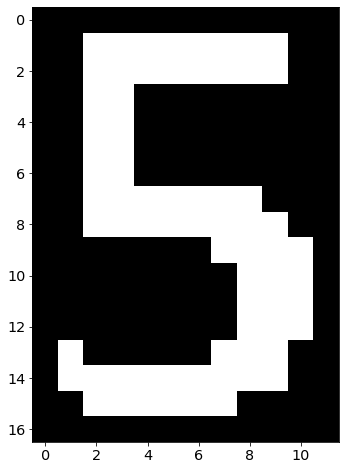

In [48]:
plt.imshow(five, cmap=plt.get_cmap('binary'))

print(f'\t\t\tПараметр шума : 0.5\n\n'
      f'\t\tFive\t\t\t\t\t'
      f'Six\n')
for digit in five_noise_high_vect:
    print(f'{1-distance.hamming(five_ref_vect, digit)}\t\t'
          f'{1-distance.hamming(six_ref_vect, digit)}')

In [45]:
import pandas as pd
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0]
sp

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
499,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
502,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873
